                               Data Gathering and Analysis of Food hygiene ratings scheme

Libraries Required

In [2]:
from bs4 import BeautifulSoup 
import urllib.request as urllib2
import re
import pandas as pd
import requests        
import xml.etree.ElementTree as ET
import csv

Extracting list of URLs for data gathering.Data is divided based on Local Authorities in english and welsh format.Extarcting only english format for all authorities.

In [3]:
html_page = urllib2.urlopen("http://ratings.food.gov.uk/open-data/en-GB")
soup = BeautifulSoup(html_page)
links = []
#
for link in soup.findAll('a', attrs={'href': re.compile(r'en-GB.xml')}):
    links.append(link.get('href'))
    
print(links)

C:\Users\shivr\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\shivr\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['http://ratings.food.gov.uk/OpenDataFiles/FHRS297en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS109en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS701en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS110en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS227en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS111en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS228en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS155en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS027en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS112en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS702en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS113en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS114en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS156en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS028en-GB.xml', 'http://ratings.food.gov.uk/OpenDataFiles/FHRS157en-GB.xml', 'http://ratings.food.go

Function to create holistic dataset for all authorities available . selection of important and required columns 
This module will take 10 minutes to run for complete dataset storage.

In [7]:
All_AuthDF = pd.DataFrame()
for i in range(len(links)):
    weatherXML = requests.get(links[i])
    root = ET.fromstring(weatherXML.text)
    # open a file for writing
    fhrs_data = open('fhrs_Data.csv', 'w',encoding="utf-8")
    
    # create the csv writer object
    
    csvwriter = csv.writer(fhrs_data)
    fhrs_head = []
    
    count = 0
    for member in root.findall('./EstablishmentCollection/EstablishmentDetail'):
        fhrs = []
        address_list = []
        if count == 0:
            FHRSID = member.find('FHRSID').tag
            fhrs_head.append(FHRSID)
            LocalAuthorityBusinessID = member.find('LocalAuthorityBusinessID').tag
            fhrs_head.append(LocalAuthorityBusinessID)
            BusinessName = member.find('BusinessName').tag
            fhrs_head.append(BusinessName)
            BusinessType=member.find('BusinessType').tag
            fhrs_head.append(BusinessType)
            BusinessTypeID=member.find('BusinessTypeID').tag
            fhrs_head.append(BusinessTypeID)
            RatingValue=member.find('RatingValue').tag
            fhrs_head.append(RatingValue)
            RatingKey=member.find('RatingKey').tag
            fhrs_head.append(RatingKey)
            RatingDate=member.find('RatingDate').tag
            fhrs_head.append(RatingDate)
            LocalAuthorityCode=member.find('LocalAuthorityCode').tag
            fhrs_head.append(LocalAuthorityCode)
            LocalAuthorityName=member.find('LocalAuthorityName').tag
            fhrs_head.append(LocalAuthorityName)
            LocalAuthorityWebSite=member.find('LocalAuthorityWebSite').tag
            fhrs_head.append(LocalAuthorityWebSite)
            csvwriter.writerow(fhrs_head)
            count = count + 1
        FHRSID = member.find('FHRSID').text
        fhrs.append(FHRSID)
        LocalAuthorityBusinessID = member.find('LocalAuthorityBusinessID').text
        fhrs.append(LocalAuthorityBusinessID)
        BusinessName = member.find('BusinessName').text
        fhrs.append(BusinessName)
        BusinessType = member.find('BusinessType').text
        fhrs.append(BusinessType)
        BusinessTypeID = member.find('BusinessTypeID').text
        fhrs.append(BusinessTypeID)
        RatingValue = member.find('RatingValue').text
        fhrs.append(RatingValue)
        RatingKey = member.find('RatingKey').text
        fhrs.append(RatingKey)
        RatingDate = member.find('RatingDate').text
        fhrs.append(RatingDate)
        LocalAuthorityCode = member.find('LocalAuthorityCode').text
        fhrs.append(LocalAuthorityCode)
        LocalAuthorityName = member.find('LocalAuthorityName').text
        fhrs.append(LocalAuthorityName)
        LocalAuthorityWebSite = member.find('LocalAuthorityWebSite').text
        fhrs.append(LocalAuthorityWebSite)
 #       LocalAuthorityEmailAddress = member.find('LocalAuthorityEmailAddress').text
 #       fhrs.append(LocalAuthorityEmailAddress)
        csvwriter.writerow(fhrs)
    fhrs_data.close()
    data1=pd.read_csv('fhrs_Data.csv')
    All_AuthDF=All_AuthDF.append(data1)
All_AuthDF.to_csv('NHRFS_data.csv')

                         Exploratory Data Analsysis on collected data

In [6]:
All_AuthDF.LocalAuthorityName.value_counts()

Birmingham                                   6818
Glasgow City                                 5265
Leeds                                        4925
Cornwall                                     4653
Westminster                                  4445
Sheffield                                    4349
Durham                                       4336
Edinburgh (City of)                          4254
Manchester                                   4212
Fife                                         4087
Bristol                                      4023
Bradford                                     4010
Highland                                     3892
Wiltshire                                    3760
Kirklees                                     3643
Liverpool                                    3458
Northumberland                               3415
Cardiff                                      3272
Brighton and Hove                            3089
Lambeth                                      3070


In [9]:
All_AuthDF.reset_index(inplace=True,drop=True)
All_AuthDF[["RatingValue","BusinessType","BusinessName"]]=All_AuthDF[["RatingValue","BusinessType","BusinessName"]].astype(str) 
food_rating=pd.DataFrame(All_AuthDF.groupby(['BusinessType'])['RatingValue'].value_counts())
All_AuthDF["RatingValue"]=['AwaitingInspection' if (All_AuthDF["RatingValue"][i]=='Awaiting Inspection') else All_AuthDF["RatingValue"][i] for i in range(len(All_AuthDF))  ]
print('Number of LocalAuthorities :',len(All_AuthDF.LocalAuthorityName.value_counts()))
print('Number of RatingValue :',len(All_AuthDF.RatingValue.value_counts()))
print('Business Types :')
print(All_AuthDF.BusinessType.unique())
print('Rating Values :')
print(All_AuthDF.RatingValue.unique())

Number of LocalAuthorities : 392
Number of RatingValue : 12
Business Types :
[array(['Hospitals/Childcare/Caring Premises', 'Restaurant/Cafe/Canteen',
       'Retailers - other', 'Manufacturers/packers',
       'Other catering premises', 'Takeaway/sandwich shop',
       'School/college/university',
       'Retailers - supermarkets/hypermarkets', 'Pub/bar/nightclub',
       'Farmers/growers', 'Hotel/bed & breakfast/guest house',
       'Mobile caterer', 'Distributors/Transporters', 'Importers/Exporters'], dtype=object)]
Rating Values :
['5' 'AwaitingInspection' 'Exempt' '4' '3' '2' '1' 'AwaitingPublication'
 '0' 'Pass' 'Improvement Required' 'Pass and Eat Safe']


In [10]:
len(All_AuthDF.FHRSID.unique())

527966

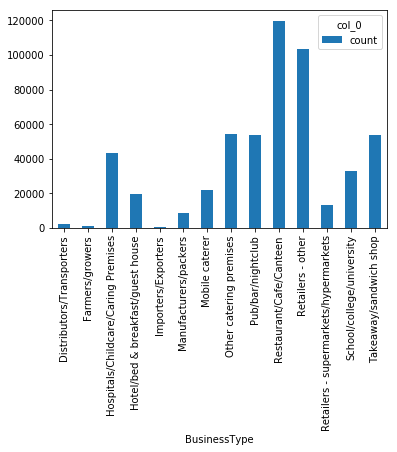

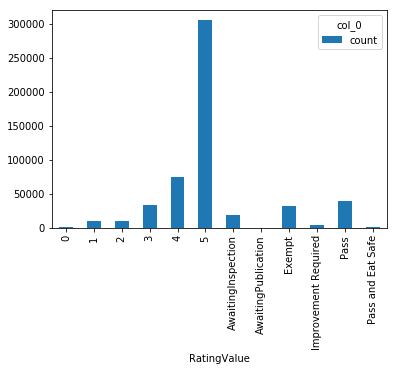

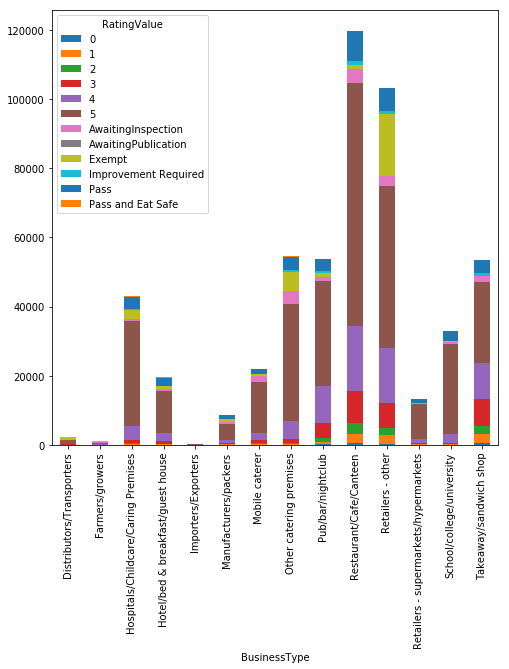

In [22]:
import matplotlib.pyplot as plt
my_tab1 = pd.crosstab(index = All_AuthDF["BusinessType"],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab2 = pd.crosstab(index = All_AuthDF["RatingValue"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab1.plot.bar()
my_tab2.plot.bar()

clarity_color_table1 = pd.crosstab(index=All_AuthDF["BusinessType"], 
                          columns=All_AuthDF["RatingValue"])
clarity_color_table1.to_csv('Rating_BusinessType.csv')

clarity_color_table2 = pd.crosstab(index=All_AuthDF["LocalAuthorityName"], 
                          columns=All_AuthDF["RatingValue"])
clarity_color_table2.to_csv('Rating_LocalAuthorityName.csv')

clarity_color_table1.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.show()
